## Final Project Submission

* Student name: Anna Chantharasouk, Piotr Czolpik, Jeff Beech
* Student pace: Full time
* Scheduled project review: 01/07/2022, 1:30 pm 
* Instructor name: Skylar English
* Blog post URL:


## Project Summary
Our group has been employed by KC Realty Group of Seattle, WA to research and discover which combination of features in single-family homes most influence selling price. Our intent is to develop a multiple regresion model to reveal the top features that guide a home's price. For this project, we will be using the King County Housing Data Set for home sales in the year 2014 and 2015.



## Column Names and Descriptions for the King County Data Set

id - Unique identifier for a house<BR>
date - Date house was sold<BR>
price - Sale price (prediction target)<BR>
bedrooms - Number of bedrooms<BR>
bathrooms - Number of bathrooms<BR>
sqft_living - Square footage of living space in the home<BR>
sqft_lot - Square footage of the lot<BR>
floors - Number of floors (levels) in house<BR>
waterfront - Whether the house is on a waterfront<BR>
view - Quality of view from house<BR>
condition - How good the overall condition of the house is. Related to maintenance of house.<BR>
grade - Overall grade of the house. Related to the construction and design of the house.<BR>
sqft_above - Square footage of house apart from basement<BR>
sqft_basement - Square footage of the basement<BR>
yr_built - Year when house was built<BR>
yr_renovated - Year when house was renovated<BR>
zipcode - ZIP Code used by the United States Postal Service<BR>
lat - Latitude coordinate<BR>
long - Longitude coordinate<BR>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors<BR>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors<BR>

## Questions to be used in analysis

### As we have discussed how to go about meeting their goals, we are centering our work around 3 questions:
<BR>
Which features are most highly correlated with price?
<BR>
Which features are most highly correlated with each other?
<BR>
Which combinations of features best predict house prices in a multiple regression model?

## Analyzing the data

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor


### Initial look at data

In [2]:
#loading csv data

df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')
df_kc

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
df_kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Distribution of variables

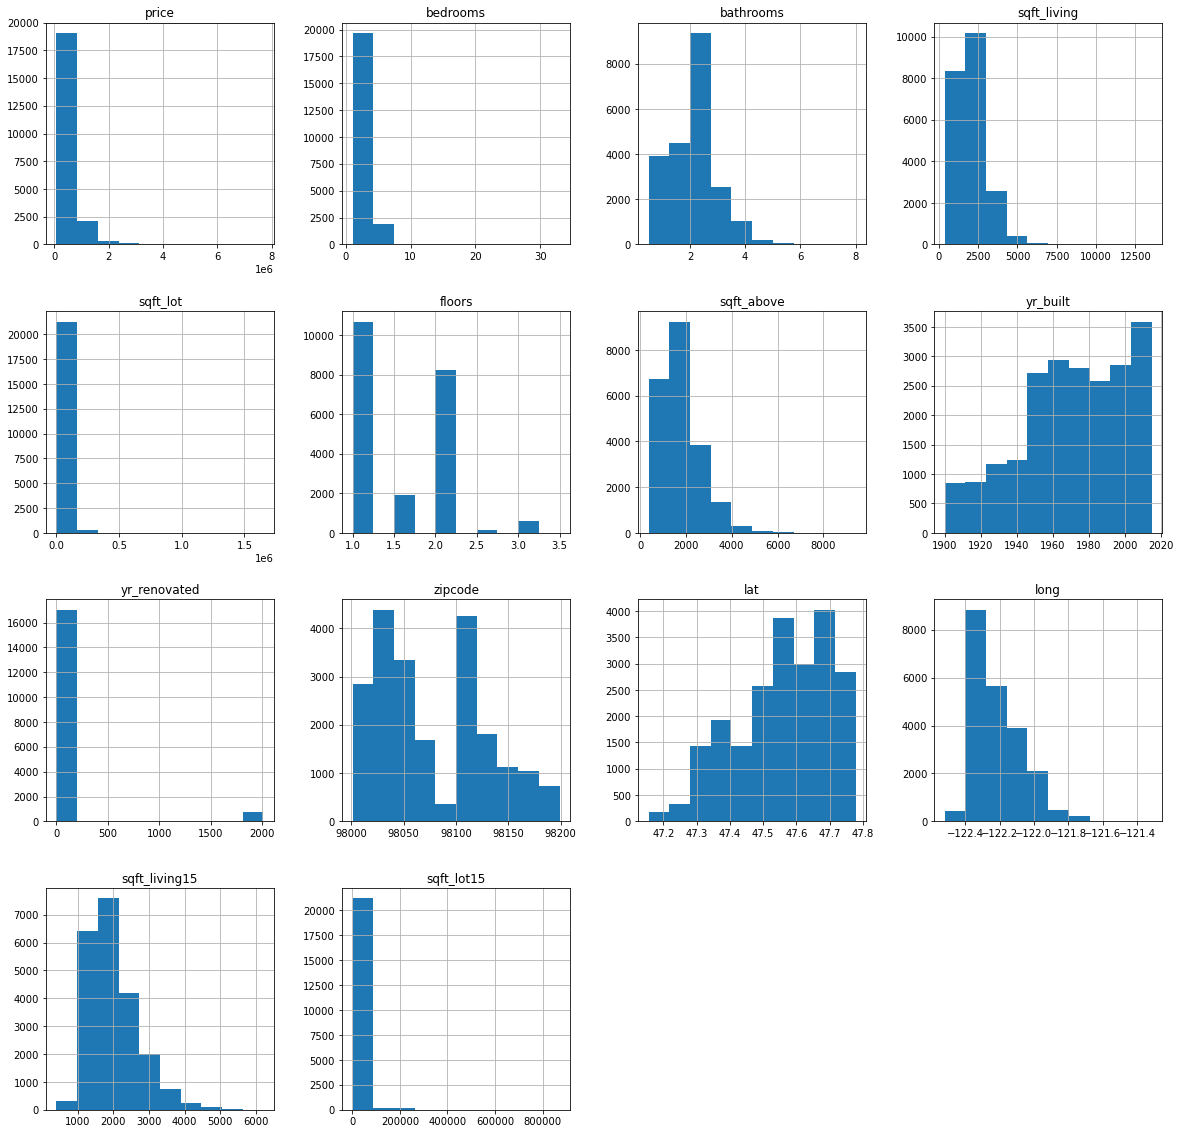

In [5]:
df_kc.hist(figsize=(20,20));

Normal distribution is not common within this data set, so that is difinitely an issue we'll have to deal with as we work through the data.  

## Drop unnecessary columns

These are columns we decided we would not use in our analysis, either because they were irrevelant for our work or did not provide enough data to warrant its inclusion.

In [6]:
df_kc.drop(['date', 'yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)


In [7]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


## Removing outliers

We chose to eliminate houses with less than 6 bedrooms or less than 5 bathrooms in order to eliminate outliers

In [8]:
df_kc['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df_kc['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [10]:
#Filtering out data to only include bedrooms with 5 or less

df_kc=df_kc[df_kc['bedrooms']<=5]

In [11]:
#Filtering out data to only include bathrooms with 4 or less

df_kc=df_kc[df_kc['bathrooms']<=4]

## Removing nulls and dropping / replacing values

The waterfront column had missing values, which we replaced with 'NO', since almost all the values were 'NO' already.  We then converted the "YES' values to 1 and the 'NO' values to 0 in order to use them in our model.

In [12]:
df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')

In [13]:
df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)

In [14]:
df_kc['waterfront'].value_counts()

0    20934
1      127
Name: waterfront, dtype: int64

We converted the values in the 'waterfront' variable from a string to integers for use in our models

In [15]:
df_kc['view'].value_counts()

NONE         19039
AVERAGE        903
GOOD           466
FAIR           317
EXCELLENT      277
Name: view, dtype: int64

In [16]:
df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4).replace(["NaN"], 0)



In [17]:
df_kc['view'] = df_kc['view'].fillna(0)

In [18]:
df_kc['view'].value_counts()

0.0    19098
2.0      903
3.0      466
1.0      317
4.0      277
Name: view, dtype: int64

## More data cleaning

The 'grade' has both a numerical value and text.  We removed the text and converted the column to an integer type

In [19]:
#checking 'grade' column and found that we need to split the data

df_kc['grade'].value_counts()

7 Average        8846
8 Good           5948
9 Better         2556
6 Low Average    2030
10 Very Good     1043
11 Excellent      310
5 Fair            239
12 Luxury          57
4 Low              27
13 Mansion          4
3 Poor              1
Name: grade, dtype: int64

In [20]:
#splitting the data column

df_kc['grade']=df_kc.grade.str.split(expand=True)

In [21]:
#casting the string into an int

df_kc['grade']=df_kc['grade'].astype(int)

In [22]:
#checking the grade column to make sure it is split correctly

df_kc['grade'].value_counts()

7     8846
8     5948
9     2556
6     2030
10    1043
11     310
5      239
12      57
4       27
13       4
3        1
Name: grade, dtype: int64

In [23]:
#verifying that 'grade' is an int

df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21061 non-null  float64
 8   grade          21061 non-null  int64  
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.6 MB


## Final data prep

For running our models, we are using these variables as our x variables to see how these features correlate to price and to each other:<BR>

bedrooms<BR>
waterfront<BR>
view<BR>
bathrooms<BR>
sqft_livingv
sqft_lot<BR>
floors<BR>
grade<BR>
sqft_above<BR>
yr_built<BR>
sqft_living15<BR>
sqft_lot15<BR>

Our target, or y, variable is 'price"

In [24]:
#determining which columns to look at

x_columns = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2

<ipython-input-24-66bbf8c5479f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


In [25]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21061 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


### Check Correlations and Multicollinearity

Our first two questions deal with how strongly a home's price is correlated to feature variable, and understanding which feature variables are strongly correlated to each other, which can deeply affect our models.  The charts and data below assist in those determinations

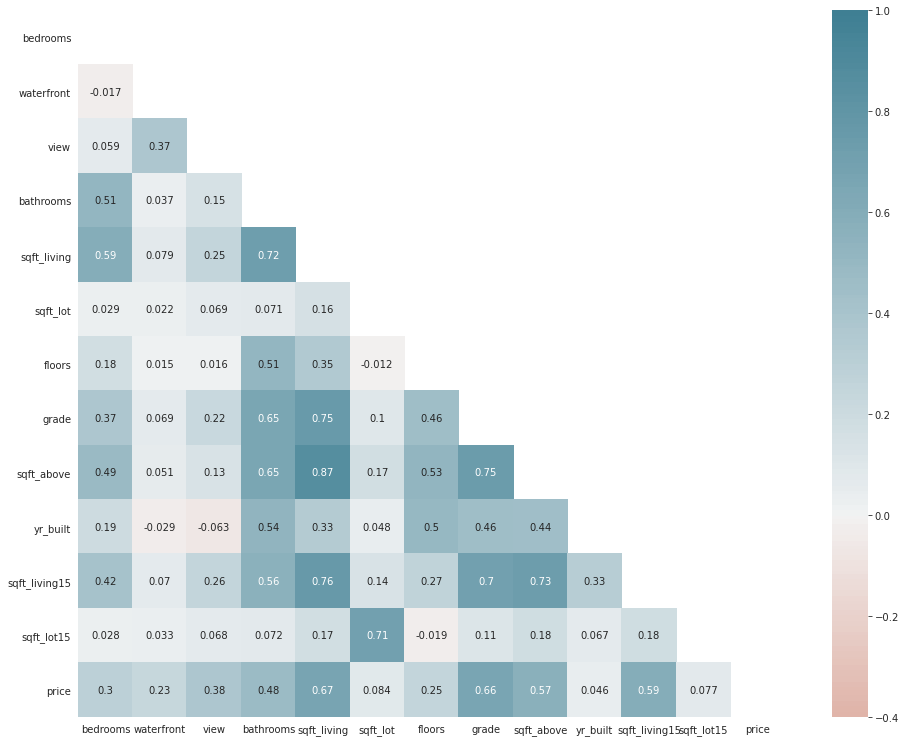

In [26]:
#creating heatmap to get a better visual of the data's correlation

corr = df_kc.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 13))
    ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n = 200),annot= True, 
                     xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values,
                     vmin = -.4,
                     vmax = 1,
                     center = 0,
                     mask=mask, square=True)

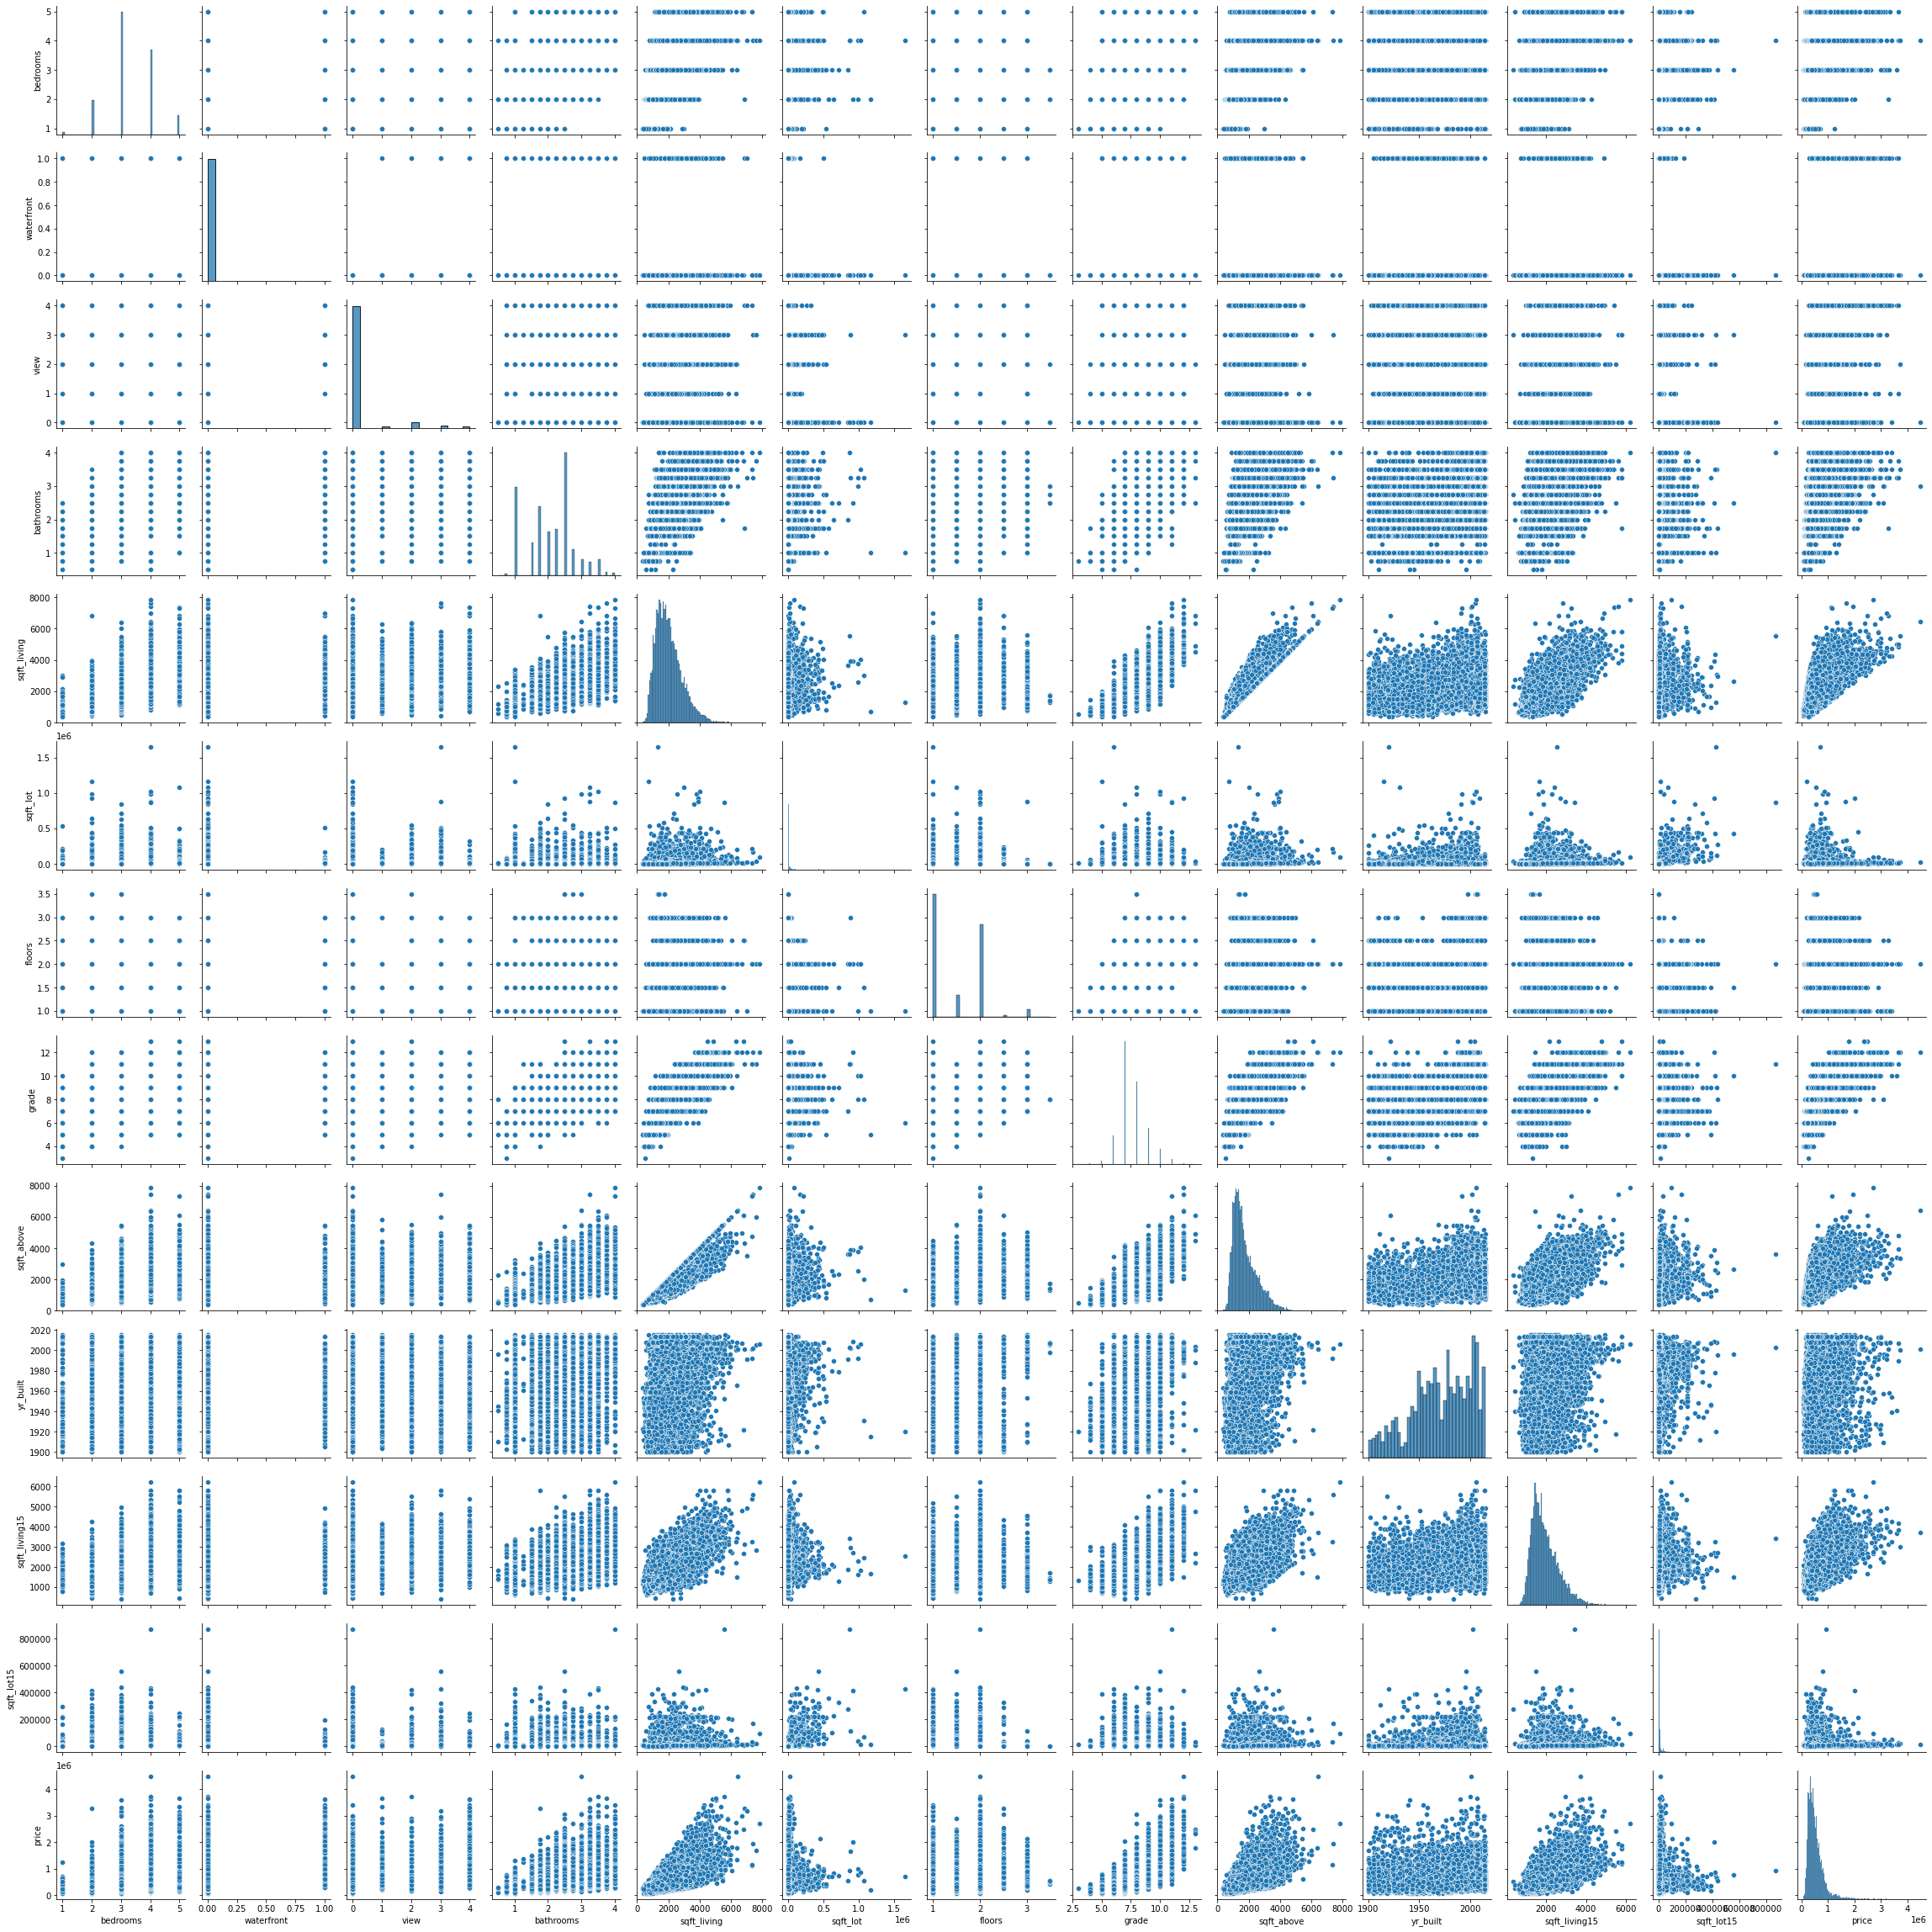

In [27]:
# Pair plots to strain our eyes
sns.pairplot(df_kc)
# sns.pairplot(df_kc, vars = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15'], dropna = True)

###  This produces a DataFrame that sorts the features most correlated to price from highest to lowest

In [28]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .2 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

corr_price_df

,Correlations,Features
4,0.671091,sqft_living
6,0.664058,grade
8,0.591469,sqft_living15
7,0.569847,sqft_above
3,0.476202,bathrooms
2,0.377976,view
0,0.299802,bedrooms
5,0.252606,floors
1,0.232981,waterfront


Because sqft_above is so closely correlated with sqft_living and several other variables, it will likely not be used in most of our models

###  This produces a DataFrame that sorts the features most correlated to each other from highest to lowest

In [29]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

MC_df

,Correlations,Features
3,0.866220,"[sqft_living, sqft_above]"
9,0.866220,"[sqft_above, sqft_living]"
4,0.763473,"[sqft_living, sqft_living15]"
12,0.763473,"[sqft_living15, sqft_living]"
2,0.754325,"[sqft_living, grade]"
6,0.754325,"[grade, sqft_living]"
7,0.745109,"[grade, sqft_above]"
10,0.745109,"[sqft_above, grade]"
11,0.733418,"[sqft_above, sqft_living15]"
14,0.733418,"[sqft_living15, sqft_above]"


Object creation of possible variables that will need to be used for our models

In [30]:
price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']
waterfront = df_kc['waterfront']
view = df_kc['view']
sqft_lot = df_kc['sqft_lot']
yr_built = df_kc['yr_built']
sqft_lot15 = df_kc['sqft_lot15']

price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])
waterfront_log = np.log(df_kc['waterfront'])
view_log = np.log(df_kc['view'])
sqft_lot_log = np.log(df_kc['sqft_lot'])
yr_built_log = np.log(df_kc['yr_built'])
sqft_lot15_log = np.log(df_kc['sqft_lot15'])

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Here are some graphs that show correlation of some individual features to price

<Figure size 432x288 with 0 Axes>

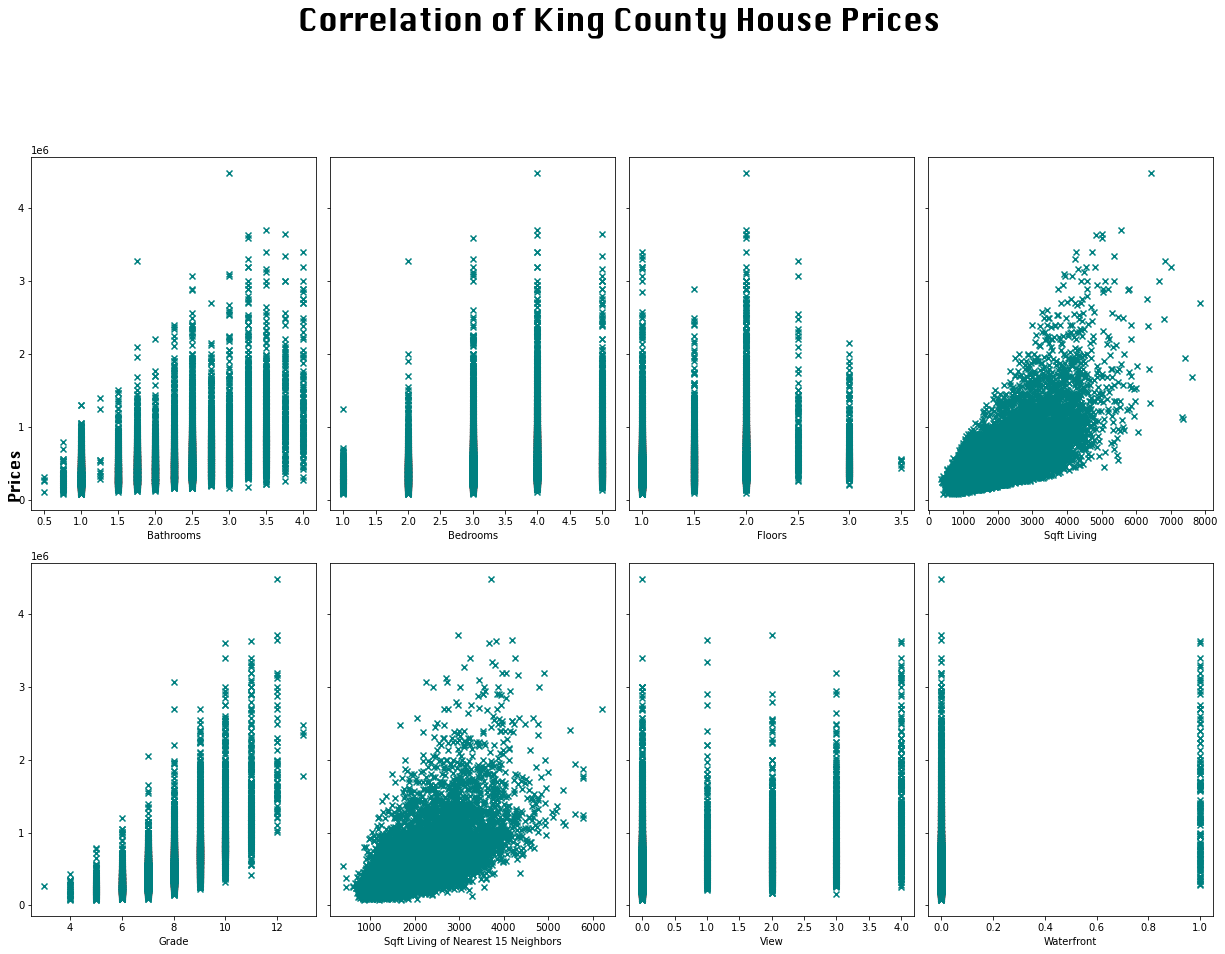

In [31]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlation of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c= "teal", marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c= "teal",marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c= "teal",marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c= "teal",marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c= "teal",marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c= "teal", marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c= "teal",marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(waterfront, price, c= "teal",marker = "x")
axes[1][3].set_xlabel('Waterfront')



f.tight_layout()
plt.show();

## Question 1 - which features are most correlated with price?

Most often, a correlation of 0.7 or higher is considered highly correlated to price, however, none of our variables meet that threshold.  Nonetheless, there are several variables just under the 0.7 mark - sqft_living, grade, sqft_living15, sqft_above and bathrooms represent the top five.

## Question 2 - which features are most correlated with other feature variables?

Most notable is the strong correlation between sqft_living and sqft_above, and sensibly so, since in houses without a basement, the two values would likely be the same.  Also, sqft_above is strong correlated with several other variables as well, so it will be dropped in most of our models to avoid multicollinearity.  

#### One last look at the DataFrame to make sure we're ready to begin creating and testing our models

In [32]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21061 non-null  int64  
 1   waterfront     21061 non-null  int64  
 2   view           21061 non-null  float64
 3   bathrooms      21061 non-null  float64
 4   sqft_living    21061 non-null  int64  
 5   sqft_lot       21061 non-null  int64  
 6   floors         21061 non-null  float64
 7   grade          21061 non-null  int64  
 8   sqft_above     21061 non-null  int64  
 9   yr_built       21061 non-null  int64  
 10  sqft_living15  21061 non-null  int64  
 11  sqft_lot15     21061 non-null  int64  
 12  price          21061 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 2.2 MB


# Regression Modeling

We're now ready to begin our multiple regression modeling.  Our process will be the same for each model, beginning with a train - test split, a scatter plot to confirm that our data is behaving in a linear fashion, and then using an ols regression test to find R-squared values and to evaluate the coeffecients.  We'll bar graph our top feature coefficient results, make decisions about what's next, and repeat the process until we are satisfied that we have found the best model.

As we move forward, we must satisfy some assumptions.  First, there should be a linear relations between the target variable (price) and the feature (x) variables. Secondly, the data should be homoscedastic, that is, the residuals should have equal variance around the regression line on a scatterplot. The residuals should also follow a normal distribution.  And, we are avoiding multicollinearity when possible.

We are especially interested in the R-squared value, since it tells us what proportion of the variabioity of y around its mean can be explained by the model.  This number falls between 0 and 1, and a higher value indicates greater power in prediction.  Here we go!

##  Model 1 - All x variables

## Train - Test Split

The key purpose of splitting the dataset into training and test sets is to estimate how well the learned model will generalize to new data. For this reason, train - test split is an essential component of building models.  

In [33]:
xx = df_kc.drop(['price'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [34]:
Reg=LinearRegression()

In [35]:
Reg.fit(x_train, y_train)

LinearRegression()

In [36]:
Reg.score(x_test, y_test)

0.618111868424954

In [37]:
Reg.score(x_train, y_train)

0.639613722865037

In [38]:
dummy=DummyRegressor()

In [39]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [40]:
dummy.score(x_test, y_test)

-0.00011100514140194306

In [41]:
y_pred = Reg.predict(x_test)
y_pred

array([478841.3575823 , 575062.78033794, 635451.94784267, ...,
       447150.40577796, 971581.37324486, 197879.8297418 ])

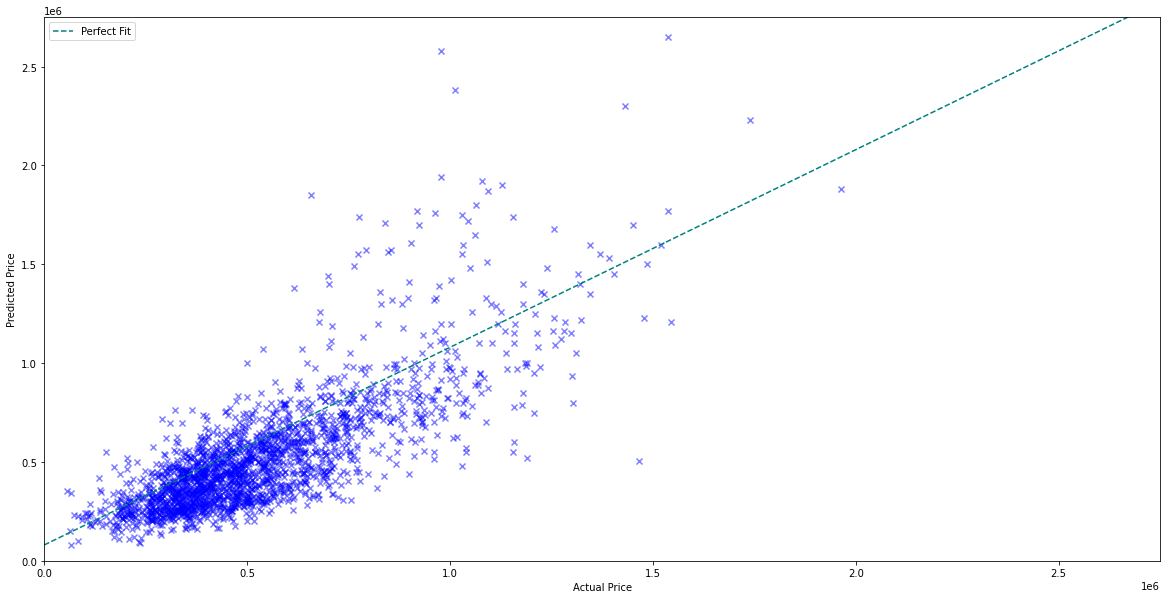

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Fitting the model

### Without standardization

In [137]:
y = df_kc['price']
x = df_kc.drop(['price'], axis = 1)

model1_fit = OLS(y,x).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          1.374e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:00:06   Log-Likelihood:                     -2.8765e+05
No. Observations:               21061   AIC:                                  5.753e+05
Df Residuals:                   21049   BIC:                                  5.754e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.293e+04   2224.271    -10.309      0.000   -2.73e+04   -1.86e+04
waterfront     4.979e+05   1.99e+04     25.033      0.000    4.59e+05    5.37e+05
view           5.762e+04   2216.849     25.993      0.000    5.33e+04     6.2e+04
bathrooms     -3.045e+04   3302.932     -9.220      0.000   -3.69e+04    -2.4e+04
sqft_living     188.4634      4.633     40.675      0.000     179.382     197.545
sqft_lot          0.0931      0.050      1.873      0.061      -0.004       0.191
floors         8707.1854   3652.586      2.384      0.017    1547.836    1.59e+04
grade          1.137e+05   2201.040     51.647      0.000    1.09e+05    1.18e+05
sqft_above      -62.6930      4.496    -13.945      0.000     -71.505     -53.881
yr_built       -292.8967      6.985    -41.931      0.000    -306.588    -279.205
sqft_living15    39.5025      3.612     10.935      0.000      32.422      46.583
sqft_lot15       -0.6352      0.077     -8.205      0.000      -0.787      -0.483
==============================================================================
Omnibus:                    10117.284   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145787.870
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      15.287   Cond. No.                     6.92e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

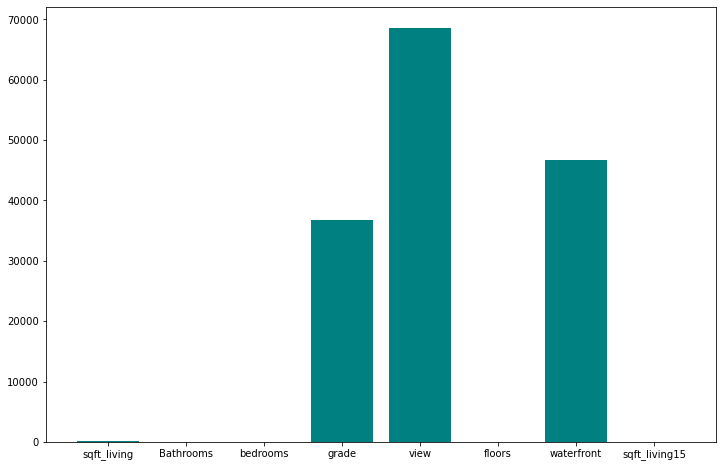

In [44]:
figure(figsize=(12,8))
df_kc_bar={'sqft_living':215.1753, 'Bathrooms':-0.0001582, 'bedrooms':-0.0006344, 'grade':36750, 'view':68630, 'floors':0.0001564, 'waterfront':46760, 'sqft_living15':30.6971}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.show()

### With standardization

This test produced some extreme results - an extremely high R-Squared value, but some odd results as seen from the graph above.  For example, one would expect the price per square foot to be very high in the mix of items that affect home price.  This is a result of the widely different range of values for these features, and calls for us to "standardize" the variables. Quite simply, we have to put our variables on the same scale, so we can get an "apples to apples" comparison. Fortunately, Python makes this easy.  The code below creates to standardized variables, which we will fit to a new model.

In [141]:
y = df_kc['price']
x = df_kc.drop(['price'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [140]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.575
Method:                 Least Squares   F-statistic:                              2596.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:01:38   Log-Likelihood:                         -20858.
No. Observations:               21061   AIC:                                  4.174e+04
Df Residuals:                   21050   BIC:                                  4.183e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0731      0.006    -12.625      0.000      -0.084      -0.062
x2             0.1195      0.005     24.613      0.000       0.110       0.129
x3             0.1384      0.005     26.801      0.000       0.128       0.149
x4            -0.0751      0.007    -10.127      0.000      -0.090      -0.061
x5             0.5221      0.012     42.700      0.000       0.498       0.546
x6             0.0115      0.006      1.798      0.072      -0.001       0.024
x7             0.0064      0.006      1.037      0.300      -0.006       0.019
x8             0.3607      0.008     46.279      0.000       0.345       0.376
x9            -0.1450      0.011    -13.126      0.000      -0.167      -0.123
x10            0.0804      0.008     10.605      0.000       0.066       0.095
x11           -0.0558      0.006     -8.661      0.000      -0.068      -0.043
==============================================================================
Omnibus:                    10149.827   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142693.208
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      15.132   Cond. No.                         7.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, this accomplished several things.  First, the R-Squared score came down significantly, and while this would not normally be a positive indication, it is now in agreement with the similar score in the train - test portion of this model.  Also, see now the difference in the graph below.

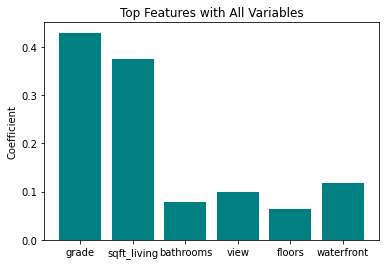

In [47]:
# Top results with positive coefficients
figsize=(10,15)

df_kc_bar={'grade':0.4293, 'sqft_living':0.3741, 'bathrooms':0.0776,'view':0.0992, 'floors':0.0645, 'waterfront':0.1188}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.title("Top Features with All Variables")
plt.ylabel('Coefficient')
plt.show()

We see here that the features here now not only seem much easier to interpret, but also satisfy the simply human filter of "making sense".  This model gives us an excellent opportunity to continue our investigation.  What if we take the top 5 coefficients from this model and isolate them to create model 2?

## Model 2 - top 5 coefficients from Model 1

Same procedure here...train - test first

In [48]:
xx = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [49]:
Reg.fit(x_train, y_train)

LinearRegression()

In [50]:
Reg.score(x_test, y_test)

0.5544035760665234

In [51]:
Reg.score(x_train, y_train)

0.5638384960957573

In [52]:
dummy=DummyRegressor()

In [53]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [54]:
dummy.score(x_test, y_test)

-0.00037497209629200334

In [55]:
y_pred = Reg.predict(x_test)
y_pred

array([364625.24541566, 329301.96942236, 373156.05984915, ...,
       391996.9614451 , 394536.25458204, 619030.49057371])

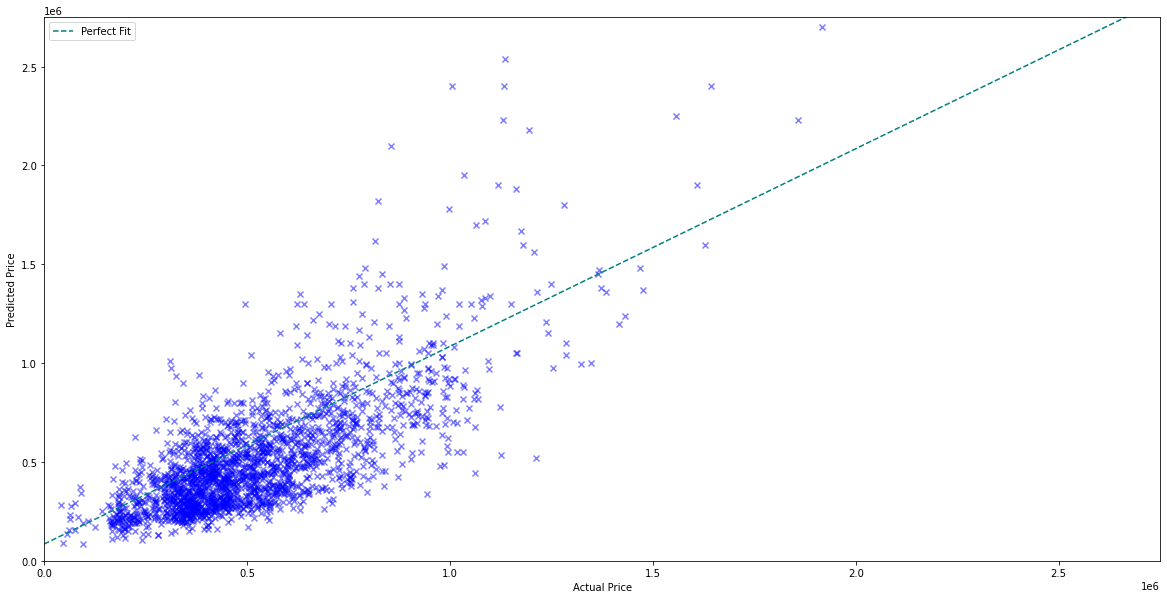

In [56]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

Our narrowed data set is still linear, so let's move ahead...

## Fitting the model

In [57]:
model = 'price ~ grade + view + waterfront + sqft_living + sqft_living15'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5426.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:59:35   Log-Likelihood:            -2.8818e+05
No. Observations:               21061   AIC:                         5.764e+05
Df Residuals:                   21055   BIC:                         5.764e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.202e+05   1.16e+04    -44.788      0.000   -5.43e+05   -4.97e+05
grade          9.428e+04   2056.330     45.850      0.000    9.03e+04    9.83e+04
view           7.021e+04   2206.702     31.815      0.000    6.59e+04    7.45e+04
waterfront     4.944e+05   2.04e+04     24.282      0.000    4.55e+05    5.34e+05
sqft_living     123.5848      3.057     40.421      0.000     117.592     129.578
sqft_living15    28.2692      3.580      7.897      0.000      21.253      35.286
==============================================================================
Omnibus:                    10368.152   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146911.884
Skew:                           2.017   Prob(JB):                         0.00
Kurtosis:                      15.294   Cond. No.                     4.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not quite as crazy as before (the R-Squared value is at least in the range it is supposed to be), but again, the coeffecient scores are all over the place.  Let's standardize these features, too.

### With standardization

In [58]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [59]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.563
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              5426.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        05:59:35   Log-Likelihood:                         -21166.
No. Observations:               21061   AIC:                                  4.234e+04
Df Residuals:                   21056   BIC:                                  4.238e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1194      0.005     24.283      0.000       0.110       0.129
x2             0.1620      0.005     31.816      0.000       0.152       0.172
x3             0.3244      0.008     40.422      0.000       0.309       0.340
x4             0.3337      0.007     45.851      0.000       0.319       0.348
x5             0.0587      0.007      7.897      0.000       0.044       0.073
==============================================================================
Omnibus:                    10368.152   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146911.884
Skew:                           2.017   Prob(JB):                         0.00
Kurtosis:                      15.294   Cond. No.                         3.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ah, much better.  No change in the R-Square, and the coefficient values are much easier to interpret.  But, we have a lower R-Squared value than our first model, and a comparison of our top coefficients shows some suspicious results...

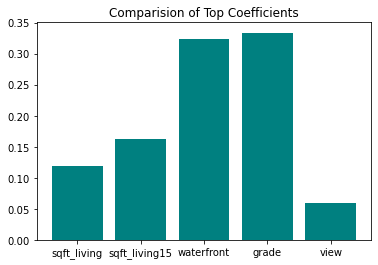

In [60]:
figsize=(15,11)
df_kc_bar={'sqft_living':0.1194, 'sqft_living15':0.1620, 'waterfront':0.3244, 'grade':0.3337, 'view':0.0587}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.title("Comparision of Top Coefficients")
plt.show()

So, by limiting the variables in this model, we created a model that doesn't completely make sense, even after we standardize the scale of the variables.  Let's try another top 5 list and see how that goes.

## Model 3 - top five most highly correlated to price

For this model, we'll take a look back up at the correlation chart we made earlier and grab the top 5 features with the highest correlation to price.  Let's see what the result will be.

In [61]:
xx = df_kc.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above','yr_built', 'sqft_lot15', 'waterfront'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [62]:
Reg.fit(x_train, y_train)

LinearRegression()

In [63]:
# df_kc.head()

In [64]:
Reg.score(x_test, y_test)

0.566435442141247

In [65]:
Reg.score(x_train, y_train)

0.5528394225817612

In [66]:
dummy=DummyRegressor()

In [67]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [68]:
dummy.score(x_test, y_test)

-0.00019766701194035008

In [69]:
y_pred = Reg.predict(x_test)
y_pred

array([570827.91487119, 671072.20868986, 604310.54622548, ...,
       570485.96088231, 605747.53235661, 293845.99876   ])

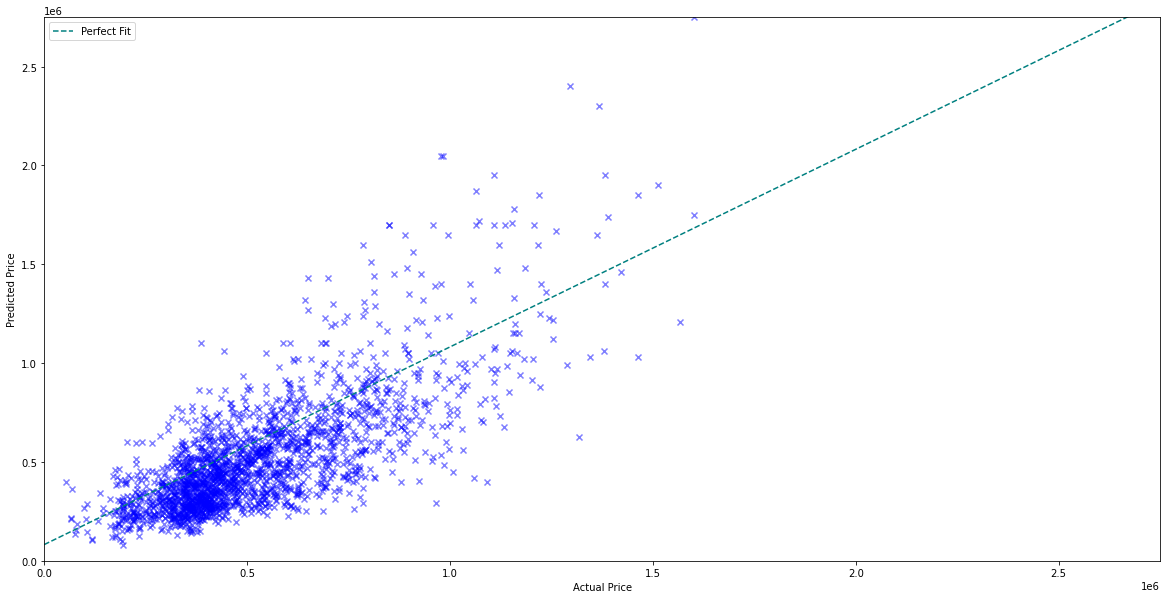

In [70]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

So far, so good - let's check out our R-squared and coefficients

## Fitting the model

In [71]:
# multiple regression model with grade, view, bathrooms, sqft_living and sqft_living15

model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     5232.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:59:37   Log-Likelihood:            -2.8840e+05
No. Observations:               21061   AIC:                         5.768e+05
Df Residuals:                   21055   BIC:                         5.769e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.205e+05   1.17e+04    -44.367      0.000   -5.44e+05   -4.98e+05
grade          1.008e+05   2139.718     47.100      0.000    9.66e+04    1.05e+05
view           8.842e+04   2076.239     42.586      0.000    8.43e+04    9.25e+04
bathrooms     -3.875e+04   3113.592    -12.444      0.000   -4.48e+04   -3.26e+04
sqft_living     143.1310      3.445     41.550      0.000     136.379     149.883
sqft_living15    23.4397      3.620      6.474      0.000      16.343      30.536
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you might have suspected by this point, these variables need to be standardized...here we go.

### With standardization

In [72]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'sqft_above','yr_built', 'sqft_lot15', 'waterfront'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [73]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              5233.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        05:59:37   Log-Likelihood:                         -21380.
No. Observations:               21061   AIC:                                  4.277e+04
Df Residuals:                   21056   BIC:                                  4.281e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2041      0.005     42.587      0.000       0.195       0.213
x2            -0.0857      0.007    -12.444      0.000      -0.099      -0.072
x3             0.3757      0.009     41.551      0.000       0.358       0.393
x4             0.3567      0.008     47.101      0.000       0.342       0.372
x5             0.0487      0.008      6.474      0.000       0.034       0.063
==============================================================================
Omnibus:                    10817.657   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163641.336
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      15.986   Cond. No.                         4.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Odd results here, also. This model suggest that the number of bathrooms in a home is the best predictor of its value, although it gives high value to total square feet of living space and to the quality of construction.  There is also no real change in the R-squared for this model as compared to Model 2.

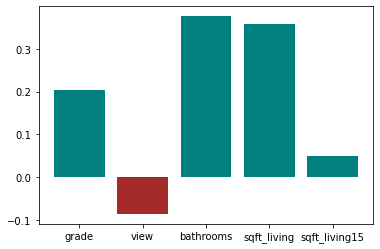

In [74]:
figsize=(8,6)
df_kc_bar={'grade':0.2041, 'view':-0.0857, 'bathrooms':0.3757, 'sqft_living':0.3567, 'sqft_living15':0.0487}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal','brown','teal','teal','teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.show()

## Model 4 - Quality of Life

Let's try a quality of life model; a model that focuses on comfort and emotional satifaction like a great view, a waterfront property, a large house, etc.  We'll use these variables - bedrooms, waterfront, view, bathrooms, sqft_living, grade, and sqft_living15.

In [75]:
xx = df_kc.drop(['price', 'sqft_lot','floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [76]:
Reg.fit(x_train, y_train)

LinearRegression()

In [77]:
Reg.score(x_test, y_test)

0.5760031471233147

In [78]:
Reg.score(x_train, y_train)

0.5677717083718793

In [79]:
dummy=DummyRegressor()

In [80]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [81]:
dummy.score(x_test, y_test)

-4.542473983870643e-05

In [82]:
y_pred = Reg.predict(x_test)
y_pred

array([295935.81419074, 331326.52044646, 530235.91391994, ...,
       929774.97376118, 198070.59025644, 778846.89604346])

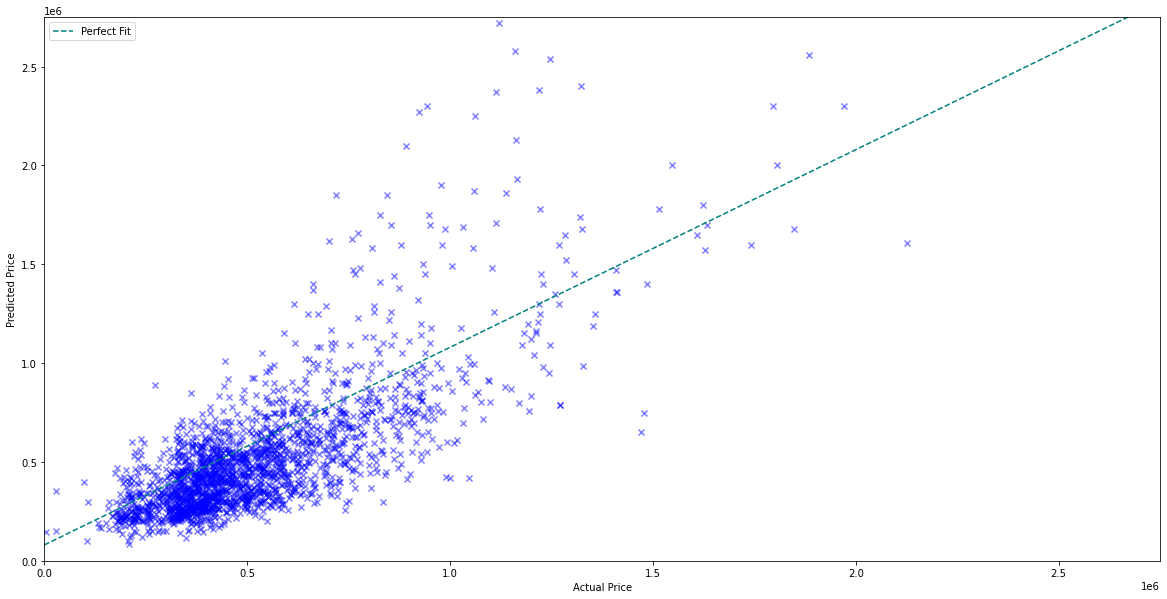

In [83]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Fitting the model

In [84]:
model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15 + waterfront + bedrooms'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3967.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        05:59:40   Log-Likelihood:            -2.8804e+05
No. Observations:               21061   AIC:                         5.761e+05
Df Residuals:                   21053   BIC:                         5.762e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.506e+05   1.31e+04    -34.277      0.000   -4.76e+05   -4.25e+05
grade          9.654e+04   2133.367     45.252      0.000    9.24e+04    1.01e+05
view           6.698e+04   2201.269     30.428      0.000    6.27e+04    7.13e+04
bathrooms     -3.157e+04   3111.150    -10.148      0.000   -3.77e+04   -2.55e+04
sqft_living     157.6727      3.657     43.116      0.000     150.505     164.841
sqft_living15    25.6693      3.562      7.207      0.000      18.688      32.651
waterfront     4.818e+05   2.02e+04     23.797      0.000    4.42e+05    5.22e+05
bedrooms      -2.554e+04   2257.843    -11.311      0.000      -3e+04   -2.11e+04
==============================================================================
Omnibus:                    10143.205   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138866.491
Skew:                           1.970   Prob(JB):                         0.00
Kurtosis:                      14.946   Cond. No.                     4.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you might have suspected by this point, these variables need to be standardized...here we go.

### With standardization

In [85]:
y = df_kc['price']
x = df_kc.drop(['price', 'sqft_lot','floors', 'sqft_above', 'yr_built', 'sqft_lot15'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [86]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.569
Model:                            OLS   Adj. R-squared (uncentered):              0.569
Method:                 Least Squares   F-statistic:                              3967.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        05:59:40   Log-Likelihood:                         -21027.
No. Observations:               21061   AIC:                                  4.207e+04
Df Residuals:                   21054   BIC:                                  4.212e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0655      0.006    -11.311      0.000      -0.077      -0.054
x2             0.1163      0.005     23.798      0.000       0.107       0.126
x3             0.1546      0.005     30.428      0.000       0.145       0.165
x4            -0.0698      0.007    -10.148      0.000      -0.083      -0.056
x5             0.4138      0.010     43.117      0.000       0.395       0.433
x6             0.3417      0.008     45.253      0.000       0.327       0.356
x7             0.0533      0.007      7.207      0.000       0.039       0.068
==============================================================================
Omnibus:                    10143.205   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138866.491
Skew:                           1.970   Prob(JB):                         0.00
Kurtosis:                      14.946   Cond. No.                         4.58
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No help here, either.  Grade and square feet of living space actually have negative scores.  You might remember that in our initial model, they were the top 2.

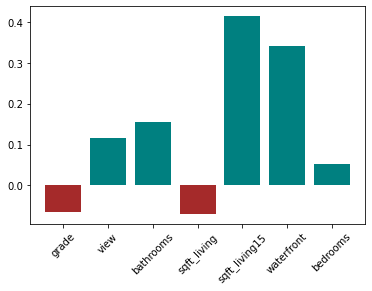

In [129]:
figsize=(8,6)
df_kc_bar={'grade':-0.0655, 'view':0.1163, 'bathrooms':0.1546, 'sqft_living':-0.0698, 'sqft_living15':0.4138, 'waterfront':0.3417, 'bedrooms':0.0533}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['brown','teal','teal','brown','teal','teal','teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()),rotation = 45)
plt.show()

We're going to take one more shot at this - with out top 5 coefficients from Model 2, but adding yr_build into the mix

## Model 5 - top 5 coefficients from Model 1 plus yr_built

Same procedure here...train - test first

In [119]:
xx = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_lot15'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [120]:
Reg.fit(x_train, y_train)

LinearRegression()

In [121]:
Reg.score(x_test, y_test)

0.6507214866083019

In [122]:
Reg.score(x_train, y_train)

0.6234518887837774

In [123]:
dummy=DummyRegressor()

In [124]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [125]:
dummy.score(x_test, y_test)

-0.0006085725295148503

In [126]:
y_pred = Reg.predict(x_test)
y_pred

array([ 293446.08525448,  182445.28843844,  294732.95884133, ...,
        291791.35309457,  525148.75879248, 1091834.24081805])

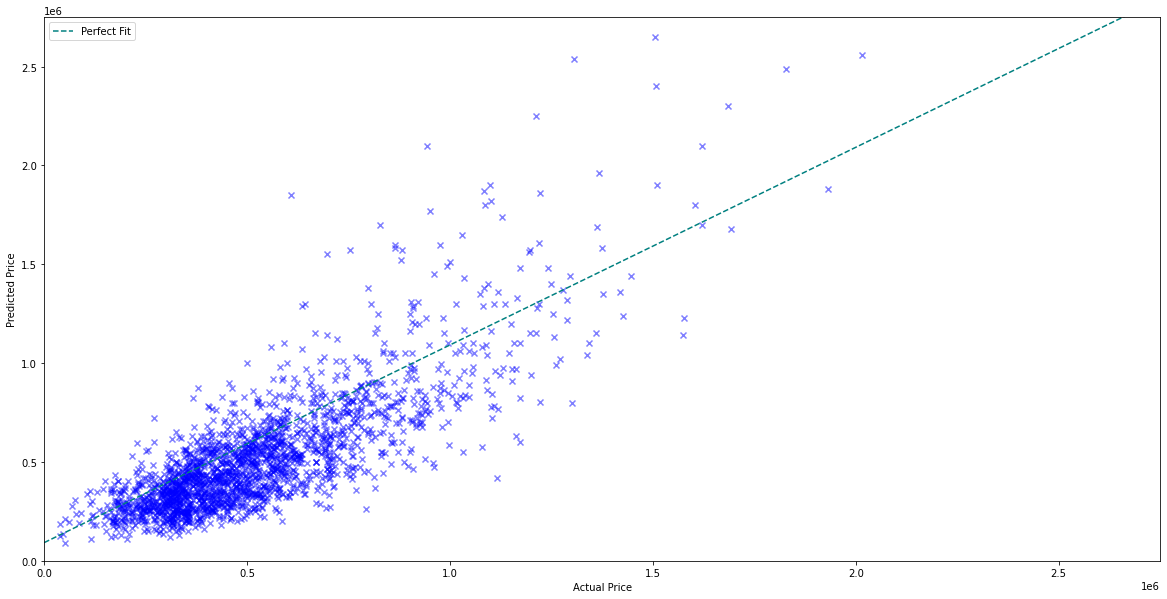

In [127]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

This one is more promising...

## Fitting the model

In [111]:
model = 'price ~ grade + view + waterfront + sqft_living + sqft_living15 + yr_built'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     5887.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:08:32   Log-Likelihood:            -2.8653e+05
No. Observations:               21061   AIC:                         5.731e+05
Df Residuals:                   21054   BIC:                         5.731e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.404e+06   9.96e+04     54.254      0.000    5.21e+06     5.6e+06
grade          1.325e+05   2005.331     66.050      0.000    1.29e+05    1.36e+05
view           4.773e+04   2074.469     23.006      0.000    4.37e+04    5.18e+04
waterfront     4.987e+05   1.88e+04     26.492      0.000    4.62e+05    5.36e+05
sqft_living     121.5774      2.827     43.007      0.000     116.036     127.118
sqft_living15    36.3493      3.312     10.974      0.000      29.857      42.842
yr_built      -3156.7173     52.766    -59.825      0.000   -3260.142   -3053.292
==============================================================================
Omnibus:                    10511.700   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180226.979
Skew:                           1.990   Prob(JB):                         0.00
Kurtosis:                      16.767   Cond. No.                     2.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is our best model since Model 1 in terms of R-squared.  Let's standardize our scales.

### With standardization

In [112]:
y = df_kc['price']
x = df_kc.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_lot15'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [113]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              5887.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        06:10:03   Log-Likelihood:                         -19513.
No. Observations:               21061   AIC:                                  3.904e+04
Df Residuals:                   21055   BIC:                                  3.908e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1204      0.005     26.493      0.000       0.111       0.129
x2             0.1102      0.005     23.007      0.000       0.101       0.120
x3             0.3191      0.007     43.008      0.000       0.305       0.334
x4             0.4688      0.007     66.051      0.000       0.455       0.483
x5            -0.2885      0.005    -59.826      0.000      -0.298      -0.279
x6             0.0755      0.007     10.974      0.000       0.062       0.089
==============================================================================
Omnibus:                    10511.700   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180226.979
Skew:                           1.990   Prob(JB):                         0.00
Kurtosis:                      16.767   Cond. No.                         3.61
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ah, much better.  No change in the R-Square, and the coefficient values are much easier to interpret.  But, we have a lower R-Squared value than our first model, and a comparison of our top coefficients shows some suspicious results...

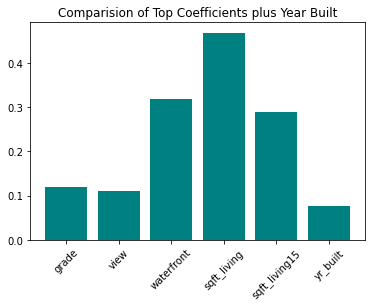

In [128]:
figsize=(15,11)
df_kc_bar={'grade':0.1204, 'view':0.1102, 'waterfront':0.3191, 'sqft_living':0.4688, 'sqft_living15':0.2885, 'yr_built':0.0755}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()),rotation = 45)
plt.title("Comparision of Top Coefficients plus Year Built")
plt.show()

This model has interesting results.  The yr_built variable ranks last in coeffiients, but pushes the R-squared score up several points.  

#### Reality Check

Let's do a quick check of our Model 3 and Model 4 by running the OLS test and adding yr_built to our features

In [133]:
# multiple regression model with grade, view, bathrooms, sqft_living and sqft_living15

model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15 + yr_built'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     5645.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:47:30   Log-Likelihood:            -2.8680e+05
No. Observations:               21061   AIC:                         5.736e+05
Df Residuals:                   21054   BIC:                         5.737e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.94e+06   1.11e+05     53.650      0.000    5.72e+06    6.16e+06
grade          1.298e+05   2044.523     63.466      0.000    1.26e+05    1.34e+05
view           6.709e+04   1959.102     34.246      0.000    6.33e+04    7.09e+04
bathrooms      3.789e+04   3168.918     11.956      0.000    3.17e+04    4.41e+04
sqft_living     103.4017      3.265     31.670      0.000      97.002     109.801
sqft_living15    37.1188      3.365     11.031      0.000      30.523      43.714
yr_built      -3440.7396     58.679    -58.636      0.000   -3555.756   -3325.723
==============================================================================
Omnibus:                    11546.878   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228192.320
Skew:                           2.215   Prob(JB):                         0.00
Kurtosis:                      18.505   Cond. No.                     2.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
model = 'price ~ grade + view + bathrooms + sqft_living + sqft_living15 + waterfront + bedrooms + yr_built'
model_fit = ols(formula= model, data=df_kc).fit()
model_fit_summ = model_fit.summary()

model_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     4552.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:50:16   Log-Likelihood:            -2.8633e+05
No. Observations:               21061   AIC:                         5.727e+05
Df Residuals:                   21052   BIC:                         5.727e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.158e+06   1.09e+05     56.540      0.000    5.94e+06    6.37e+06
grade          1.249e+05   2020.662     61.830      0.000    1.21e+05    1.29e+05
view           4.423e+04   2062.912     21.442      0.000    4.02e+04    4.83e+04
bathrooms      4.839e+04   3152.583     15.350      0.000    4.22e+04    5.46e+04
sqft_living     121.6261      3.422     35.542      0.000     114.919     128.334
sqft_living15    39.6255      3.291     12.040      0.000      33.175      46.076
waterfront     4.906e+05   1.87e+04     26.285      0.000    4.54e+05    5.27e+05
bedrooms      -3.291e+04   2084.635    -15.785      0.000    -3.7e+04   -2.88e+04
yr_built      -3508.7625     57.468    -61.056      0.000   -3621.404   -3396.121
==============================================================================
Omnibus:                    10594.681   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           187562.451
Skew:                           2.001   Prob(JB):                         0.00
Kurtosis:                      17.061   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### This definitely provides an interesting twist to our models.  Although yr_built was in 10th place in the coefficient list in model 1 (and had a negative value), it has a strong effect on the R-squared in all of our models.  In reviewing this data, we believe it is because the data in the yr_built column is not relevant to the other features, since it is just a four digit number with no real meaning in comparison to the other data.  Therefore, we believe that model 5's data is not relevant.  This will also affect the use of model 1

##  Model 6 - All x variables except yr_built and sqft_above

## Train - Test Split

In [172]:
xx = df_kc.drop(['price','yr_built','sqft_above'], axis = 1).values
yy = df_kc['price'].values
x_train, x_test, y_train, y_test = train_test_split(xx,yy,test_size = .1)

In [173]:
Reg=LinearRegression()

In [174]:
Reg.fit(x_train, y_train)

LinearRegression()

In [175]:
Reg.score(x_test, y_test)

0.5703450651763962

In [176]:
Reg.score(x_train, y_train)

0.5723037895282217

In [177]:
dummy=DummyRegressor()

In [178]:
dummy.fit(x_train, y_train)

DummyRegressor()

In [179]:
dummy.score(x_test, y_test)

-0.0005742848261702793

In [180]:
y_pred = Reg.predict(x_test)
y_pred

array([386654.21006991, 539318.42236273, 401418.91120758, ...,
       479111.38334654, 388793.20313993, 506778.27066733])

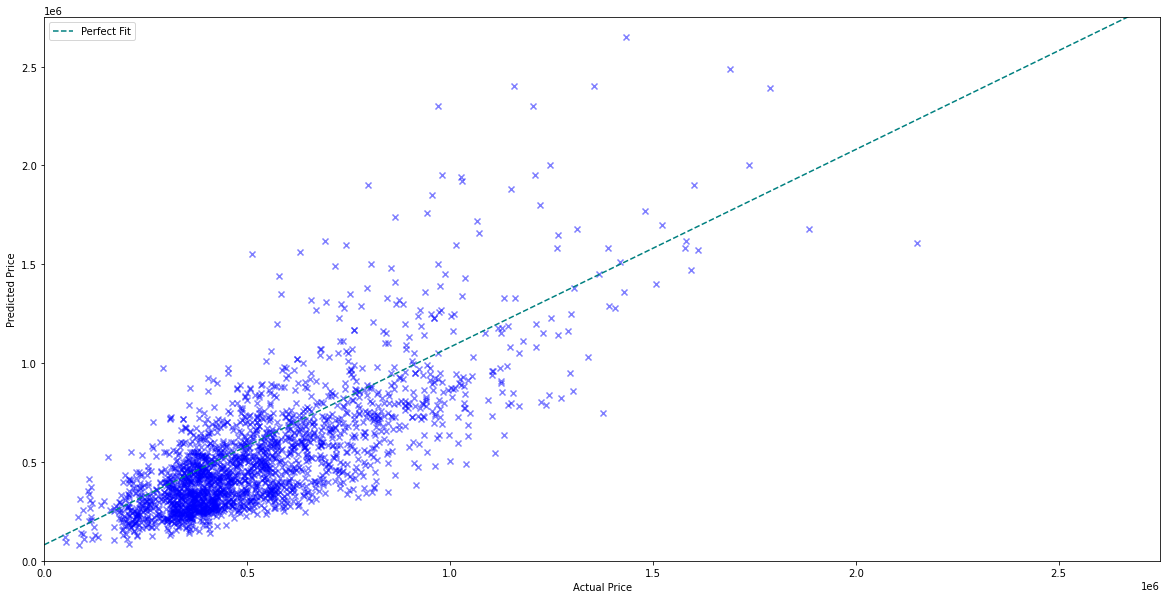

In [181]:
fig, ax = plt.subplots(figsize=(20,10))

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="teal", label="Perfect Fit")
ax.scatter(y_pred, y_test, alpha=0.5,marker= "x",color= "blue")
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
plt.title('', fontsize=16, y=.99, fontname='Silom')
ax.legend()
plt.xlim([0,2750000])
plt.ylim([0,2750000]);

## Fitting the model

### Without standardization

In [182]:
y = df_kc['price']
x = df_kc.drop(['price', 'yr_built','sqft_above'], axis = 1)

model1_fit = OLS(y,x).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                          1.503e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:29:23   Log-Likelihood:                     -2.8850e+05
No. Observations:               21061   AIC:                                  5.770e+05
Df Residuals:                   21051   BIC:                                  5.771e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -6.51e+04   2037.903    -31.944      0.000   -6.91e+04   -6.11e+04
waterfront     4.713e+05   2.07e+04     22.766      0.000    4.31e+05    5.12e+05
view           6.842e+04   2257.885     30.302      0.000     6.4e+04    7.28e+04
bathrooms     -1.751e+04   3393.485     -5.159      0.000   -2.42e+04   -1.09e+04
sqft_living     219.3608      3.333     65.809      0.000     212.827     225.894
sqft_lot          0.0454      0.052      0.878      0.380      -0.056       0.147
floors        -1.835e+04   3346.900     -5.481      0.000   -2.49e+04   -1.18e+04
grade          3.762e+04   1263.145     29.787      0.000    3.51e+04    4.01e+04
sqft_living15    34.6699      3.658      9.478      0.000      27.500      41.840
sqft_lot15       -0.8576      0.080    -10.662      0.000      -1.015      -0.700
==============================================================================
Omnibus:                    10374.602   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140114.783
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      14.962   Cond. No.                     6.92e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With standardization

In [183]:
y = df_kc['price']
x = df_kc.drop(['price',"yr_built",'sqft_above'], axis = 1)

x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_standard = y_scaler.fit_transform(y.values.reshape(-1,1))

In [184]:
model1_fit = OLS(y_standard,x_standard).fit()
model1_fit_summ = model1_fit.summary()

model1_fit_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              2815.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                        0.00
Time:                        07:29:26   Log-Likelihood:                         -20944.
No. Observations:               21061   AIC:                                  4.191e+04
Df Residuals:                   21051   BIC:                                  4.199e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0736      0.006    -12.673      0.000      -0.085      -0.062
x2             0.1175      0.005     24.122      0.000       0.108       0.127
x3             0.1520      0.005     29.923      0.000       0.142       0.162
x4            -0.0588      0.007     -8.007      0.000      -0.073      -0.044
x5             0.4232      0.010     43.770      0.000       0.404       0.442
x6             0.0072      0.006      1.122      0.262      -0.005       0.020
x7            -0.0320      0.005     -5.831      0.000      -0.043      -0.021
x8             0.3482      0.008     44.828      0.000       0.333       0.363
x9             0.0578      0.007      7.797      0.000       0.043       0.072
x10           -0.0594      0.006     -9.186      0.000      -0.072      -0.047
==============================================================================
Omnibus:                     9982.717   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133874.271
Skew:                           1.936   Prob(JB):                         0.00
Kurtosis:                      14.729   Cond. No.                         4.84
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see, this accomplished several things.  First, the R-Squared score came down significantly, and while this would not normally be a positive indication, it is now in agreement with the similar score in the train - test portion of this model.  Also, see now the difference in the graph below.

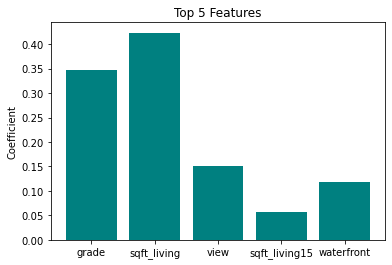

In [185]:
# Top results with positive coefficients
figsize=(10,15)

df_kc_bar={'grade':0.3482, 'sqft_living':0.4232, 'view':0.1520, 'sqft_living15':0.0578, 'waterfront':0.1175}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()))
plt.title("Top 5 Features")
plt.ylabel('Coefficient')
plt.show()

## Model 6 has become our best model

## Results

The results of our models make recommendations difficult.  First, we had a very narrow dataset consisting of only a few years of data to build our models.  Secondly, our R-Squared values never broke the 0.7 mark after standardization, which weakened the strength of our model.  Here's a chart of our R-squared values for each model: 

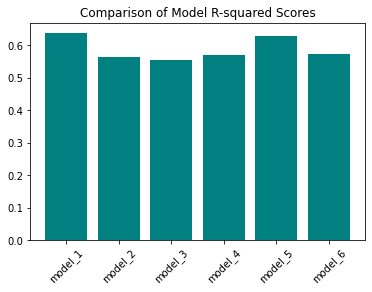

In [171]:
figsize=(15,11)
df_kc_bar={'model_1':0.637, 'model_2':0.563, 'model_3':0.554, 'model_4':0.569, 'model_5':0.627, 'model_6':0.572}
plt.bar(range(len(df_kc_bar)), list(df_kc_bar.values()), align='center', color=['teal'])
plt.xticks(range(len(df_kc_bar)), list(df_kc_bar.keys()),rotation = 45)
plt.title("Comparison of Model R-squared Scores")
plt.show()

#### Although model_1 and model_5 showed the highest scores, their use of the yr_built feature makes their results invalid.  

## Question 3

Question 3, "Which combinations of features best predict house prices in a multiple regression model?", can now be answered by recommending the use of our 6th model, which showed sqft_living, grade, view, waterfront, and sqft_living15 as the variables which have the most affect on home prices.  We will clarify to the stakeholder that these results could be improved with more data, but that we believe they can use these features to maximize home prices and profitability for their company and clients.

## Conclusion

Our ultimate conclusion is that this dataset has a mountain of relevant information to make predictions about home prices and relevant features, but a greater range of years of sales and perhaps more data points could provide greater clarity to our analysis.